In [1]:
import time
t0 = time.time()
K_MAX = 800
R_MAX = 400
Z_MAX = 400

%run GenerateParameters.ipynb

Generating cache table of size 400x400x800 (~26.9 bits)...


  0%|          | 0/399 [00:00<?, ?it/s]

Done. Table generation took 4.9 seconds


In [2]:
def get_samples(r, z, l, nsamples):
    p1 = np.random.poisson(r * l, nsamples)
    p2 = np.random.poisson(z * l, int(2 * (1 / (1 - np.exp(-l*z)) * nsamples)))
    p2 = p2[p2 != 0]
    assert len(p2) > len(p1)
    return p1 + p2[:nsamples]

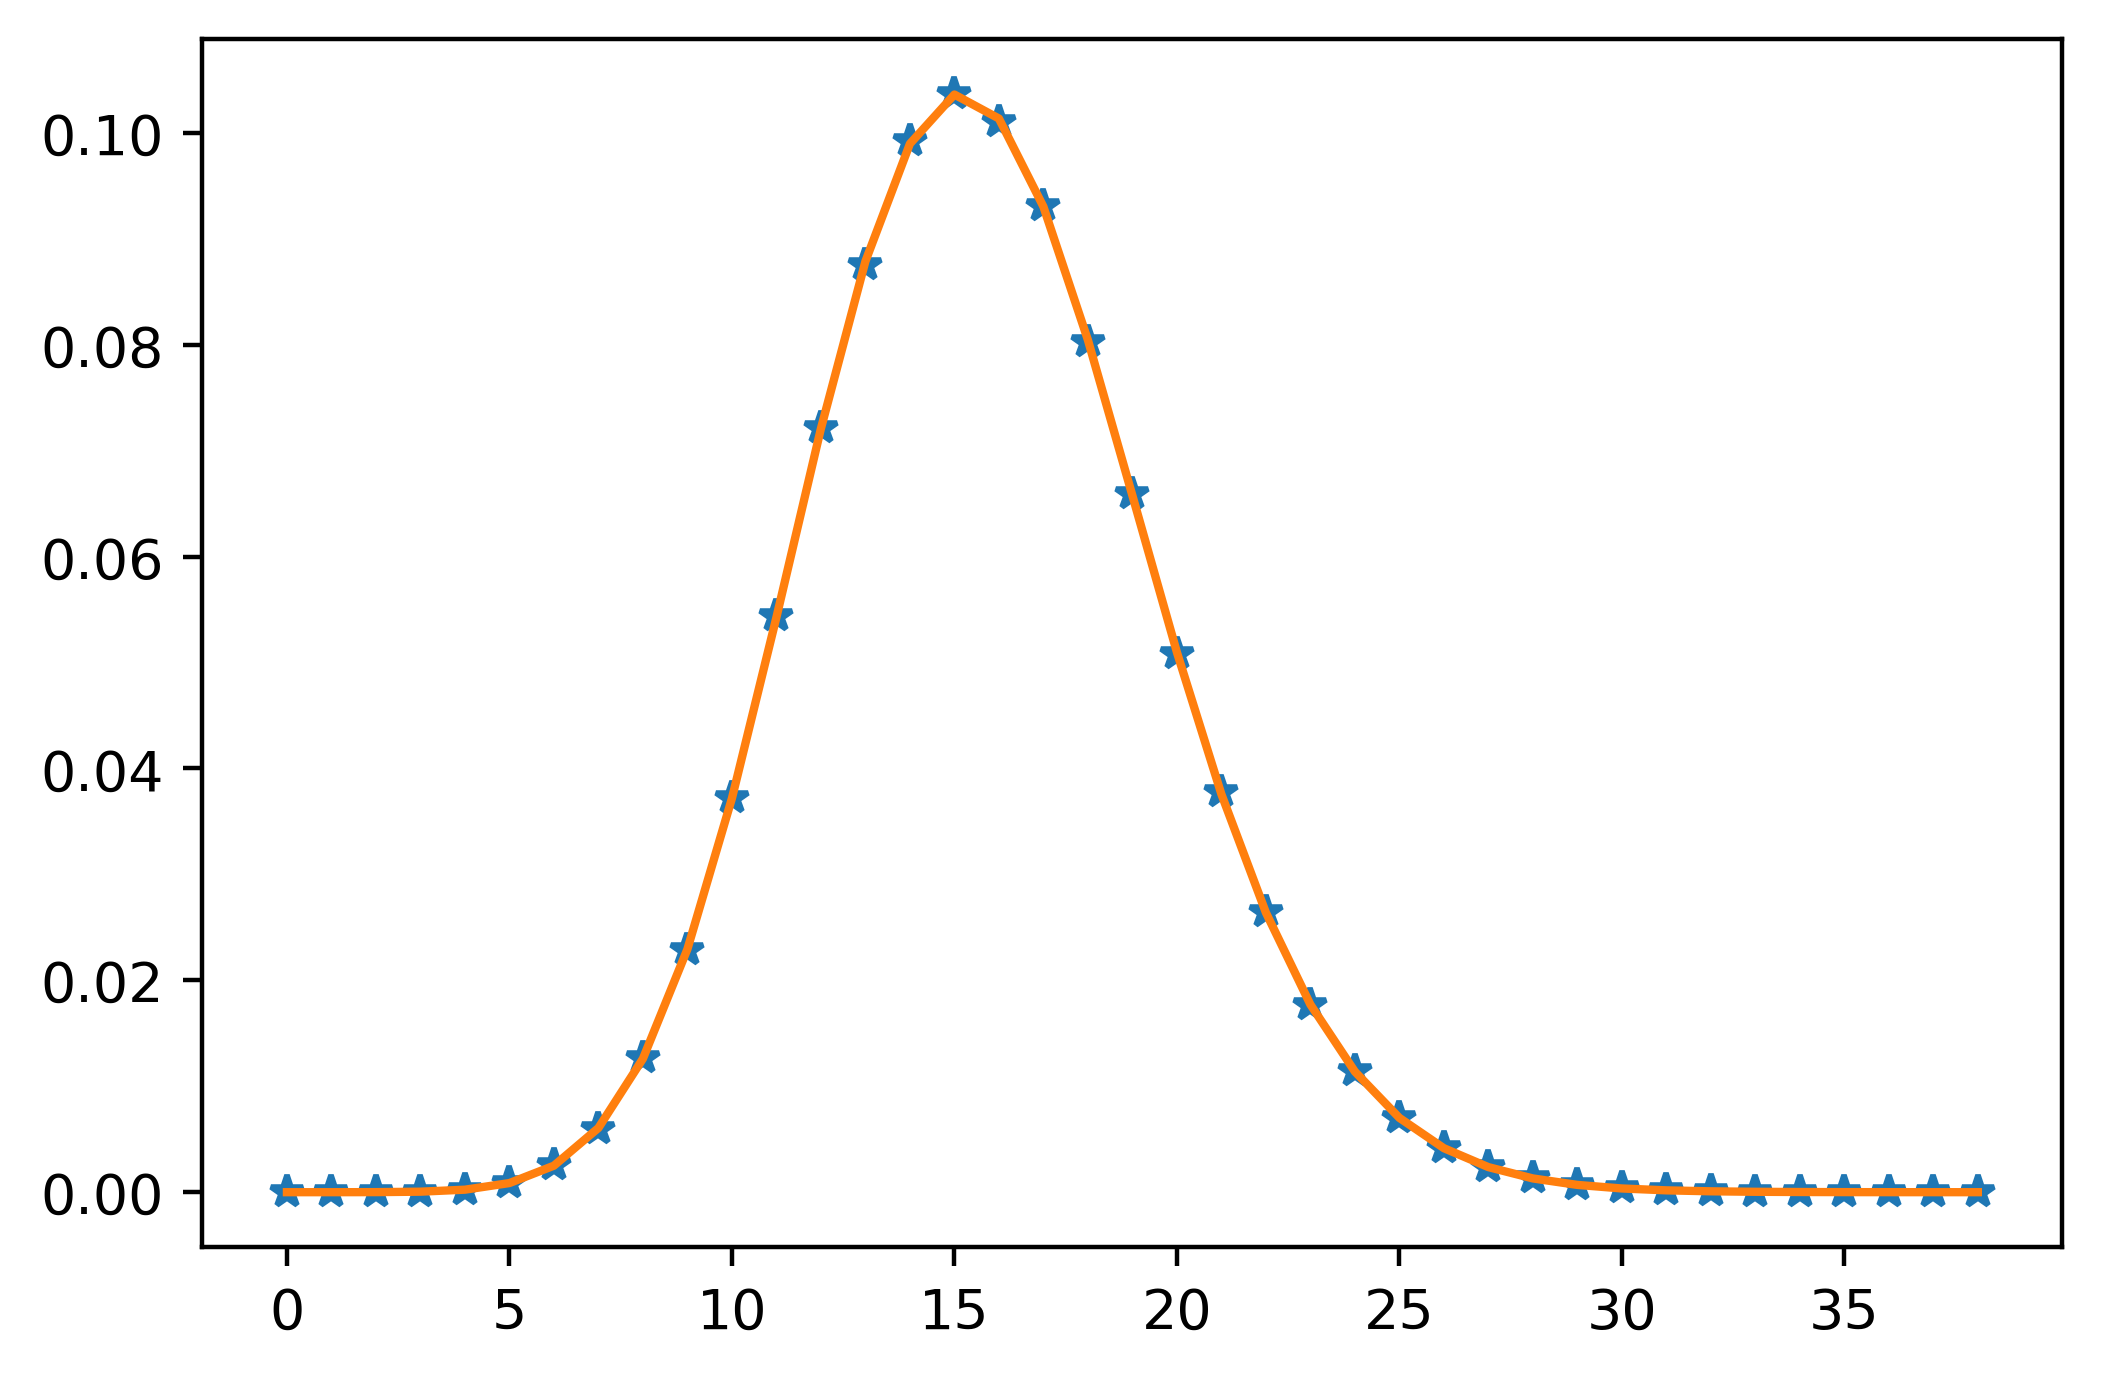

In [3]:
r = 8
z = 1
l = 1.7
samples = get_samples(r, z, l, int(1E6))

counts = np.bincount(samples)

f = plt.figure(dpi=400)
plt.plot(np.arange(len(counts)), counts / len(samples), '*')
plt.plot(np.arange(len(counts)), 
         [np.exp(get_log_transition_prob_rzkl(r, z, k, l)) / (1 - np.exp(-l*(z))) for k in range(len(counts))])

In [4]:
dist = np.array([0., 0.5, 0.25, 0.25])
# dist = [0., 1]
l = 1.
dist = stats.geom(0.13).pmf(np.arange(K_MAX))
dist = dist / np.sum(dist)
rd = RunDistribution(dist, l)

In [5]:
print(f'{rd.average_length=}')
print(f'{rd.D=}')

rd.average_length=7.692307692307692
rd.D=0.07033559384630426


In [6]:
print('Computing lower bound...')
t1 = time.time()
print(f'{rd.compute_lower_bound() / l=}')
print('This took %.1f seconds' % (time.time() - t1))

Computing lower bound...
3.1219509716796408 -8.856261106046343 0.0 6.453972691424826
rd.compute_lower_bound() / l=0.11723385181952117
This took 2.1 seconds


In [23]:
print('Computing lower bound...')
t1 = time.time()
l = 1.79
dist = stats.geom(0.23).pmf(np.arange(K_MAX))
rd = RunDistribution(dist, l)
print(f'{rd.compute_lower_bound() / l=}')
print('This took %.1f seconds' % (time.time() - t1))

Computing lower bound...
3.074442613095057 -8.500122295414988 4.948903971048484 1.17533705378933
rd.compute_lower_bound() / l=0.11856429232211224
This took 2.7 seconds


In [24]:
(1 / (0.13))

7.692307692307692

In [25]:
1.79 * (1 / (0.23))

7.782608695652174